(58, 256, 256, 3)
(58, 6)
create npy file


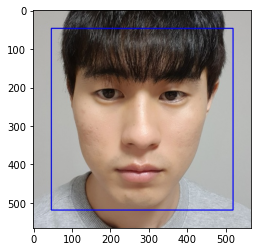

In [4]:
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import glob

#경로 수정해서 사용
data_dir = "C:/Users/Hong/Desktop/cnndata/this_is_real"
categories = ['bsb','chs','jhr','ksm','lgh','yc']

nb_class = len(categories)

image_w = 256
image_h = 256
pixel = image_w * image_h * 3

#x = image
#y = label
x = []
y = []



for idx,c in enumerate(categories):
    label = [0 for i in range(nb_class)]
    label[idx] = 1
    img_dir = data_dir + "/" + c
    files = glob.glob(img_dir + "/*.jpg")
    #print(files)
    
    for i,f in enumerate(files):
        img = Image.open(f)
        plt.imshow(img)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)
        x.append(data)
        y.append(label)
        
x = np.array(x)
print(x.shape)
y = np.array(y)
print(y.shape)


#여기서 오류발생 시
#scikit-learn downgrade
#https://stackoverflow.com/questions/56396950/how-to-fix-value-error-with-train-test-split-in-python-numpy
X_train, X_test, Y_train,Y_test = train_test_split(x, y, test_size=0.2, train_size=0.8)

image_data = (X_train, X_test, Y_train,Y_test)
#경로 수정해서 사용
np.save("C:/Users/Hong/Desktop/cnndata/facedata.npy",image_data)
print('create npy file')